# Lambda Layer

> In this post, This lab will show how you can define custom layers with the [Lambda](https://keras.io/api/layers/core_layers/lambda/) layer. You can either use [lambda functions](https://www.w3schools.com/python/python_lambda.asp) within the Lambda layer or define a custom function that the Lambda layer will call. This is the summary of lecture "Custom Models, Layers and Loss functions with Tensorflow" from DeepLearning.AI.

- toc: true 
- badges: true
- comments: true
- author: Chanseok Kang
- categories: [Python, Coursera, Tensorflow, DeepLearining.AI]
- image: 

## Packages

In [1]:
import tensorflow as tf
from tensorflow.keras.utils import plot_model
from tensorflow.keras import backend as K

import matplotlib.pyplot as plt
import numpy as np

## Prepare the Data

We will use mnist dataset for the check.

In [2]:
mnist = tf.keras.datasets.mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train, X_test = X_train / 255.0, X_test / 255.0

## Build the model

Here, we'll use a Lambda layer to define a custom layer in our network. We're using a lambda function to get the absolute value of the layer input.

In [3]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128),
    tf.keras.layers.Lambda(lambda x: tf.abs(x)),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

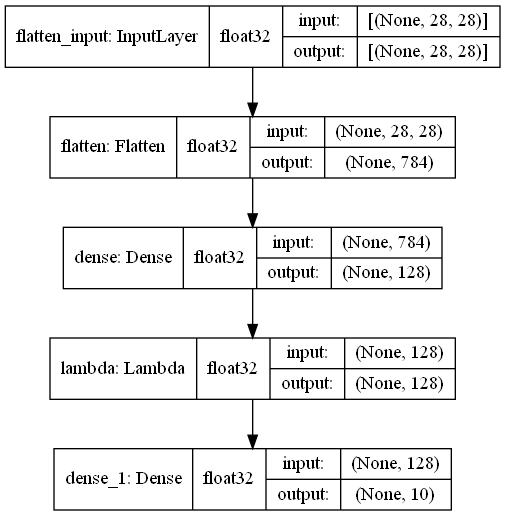

In [7]:
plot_model(model, show_layer_names=True, show_shapes=True, show_dtype=True, to_file='./model.png')

In [9]:
model.fit(X_train, y_train, epochs=5)
model.evaluate(X_test, y_test)

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2208 - accuracy: 0.9371
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0913 - accuracy: 0.9722
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0621 - accuracy: 0.9810
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0477 - accuracy: 0.9848
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.0802 - accuracy: 0.9747


[0.08019807934761047, 0.9746999740600586]

Another way to use the Lambda layer is to pass in a function defined outside the model. The code below shows how a custom ReLU function is used as a custom layer in the model.

In [10]:
def my_relu(x):
    return K.maximum(-0.1, x)

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128),
    tf.keras.layers.Lambda(my_relu), 
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=5)
model.evaluate(X_test, y_test)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2565 - accuracy: 0.9263
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1117 - accuracy: 0.9671
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0769 - accuracy: 0.9765
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0546 - accuracy: 0.9834
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.0705 - accuracy: 0.9783


[0.0704924687743187, 0.9782999753952026]